#### ***STEP 2 Clustering*** 

In [1]:
#get basic data to run notebook
import os
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

DATA_DIR = r"C:\PAML\PAML Project\data"

df_gex = pd.read_csv(os.path.join(DATA_DIR, "mammacarcinoma_gex.csv"))
df_pat = pd.read_csv(os.path.join(DATA_DIR, "mammacarcinoma_pat.csv"))


X = df_gex.drop(columns="patient_id").values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_5 = PCA(n_components=5, random_state=42)
X_pca_5 = pca_5.fit_transform(X_scaled)

print("X_pca_5 shape:", X_pca_5.shape)


X_pca_5 shape: (327, 5)


#### ***K-NN***

In [2]:
#start with knn als clsutering algorithm
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca_5)


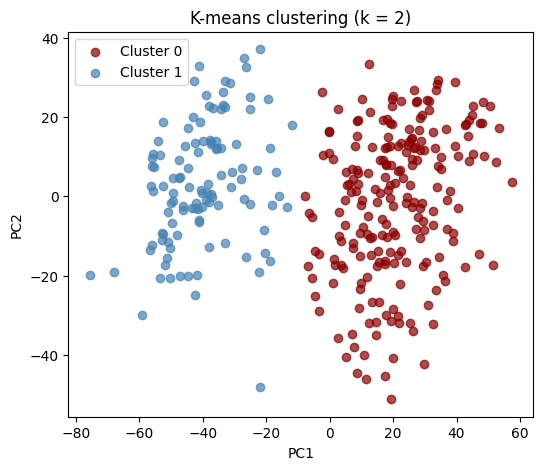

In [3]:
#knn colorfull clsuters
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))

plt.scatter(
    X_pca_5[cluster_labels == 0, 0],
    X_pca_5[cluster_labels == 0, 1],
    color="darkred",
    alpha=0.7,
    label="Cluster 0"
)

plt.scatter(
    X_pca_5[cluster_labels == 1, 0],
    X_pca_5[cluster_labels == 1, 1],
    color="steelblue",
    alpha=0.7,
    label="Cluster 1"
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means clustering (k = 2)")
plt.legend()
plt.show()


#### ***GMM***

In [4]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(
    n_components=2,
    covariance_type="full",
    random_state=42
)

labels_gmm = gmm.fit_predict(X_pca_5)


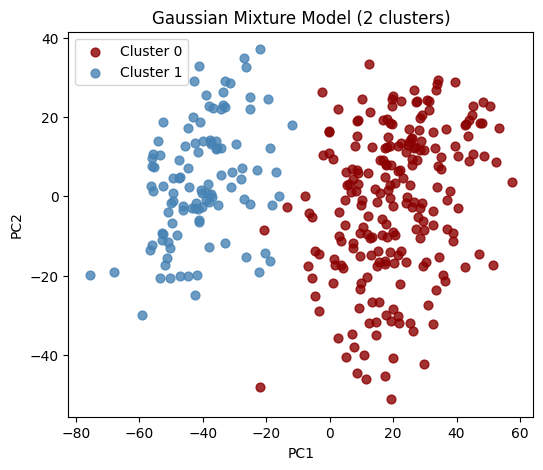

In [5]:
import matplotlib.pyplot as plt
#gmm komplett colorfull clsuters

plt.figure(figsize=(6, 5))

plt.scatter(
    X_pca_5[labels_gmm == 0, 0],
    X_pca_5[labels_gmm == 0, 1],
    color="darkred",
    label="Cluster 0",
    alpha=0.8,
    s=40
)

plt.scatter(
    X_pca_5[labels_gmm == 1, 0],
    X_pca_5[labels_gmm == 1, 1],
    color="steelblue",
    label="Cluster 1",
    alpha=0.8,
    s=40
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Gaussian Mixture Model (2 clusters)")
plt.legend()
plt.show()


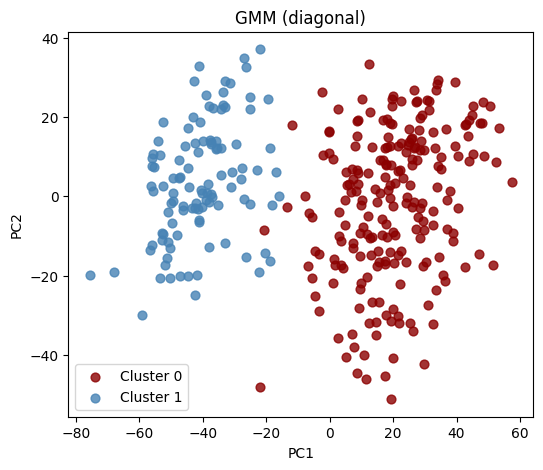

In [6]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
#gmm diagonal colorfull clsuters
gmm_diag = GaussianMixture(
    n_components=2,
    covariance_type="diag",
    random_state=42
)
labels_gmm_diag = gmm_diag.fit_predict(X_pca_5)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca_5[labels_gmm_diag == 0, 0],
            X_pca_5[labels_gmm_diag == 0, 1],
            color="darkred", alpha=0.8, s=40, label="Cluster 0")
plt.scatter(X_pca_5[labels_gmm_diag == 1, 0],
            X_pca_5[labels_gmm_diag == 1, 1],
            color="steelblue", alpha=0.8, s=40, label="Cluster 1")
plt.title("GMM (diagonal)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(loc="lower left")
plt.show()


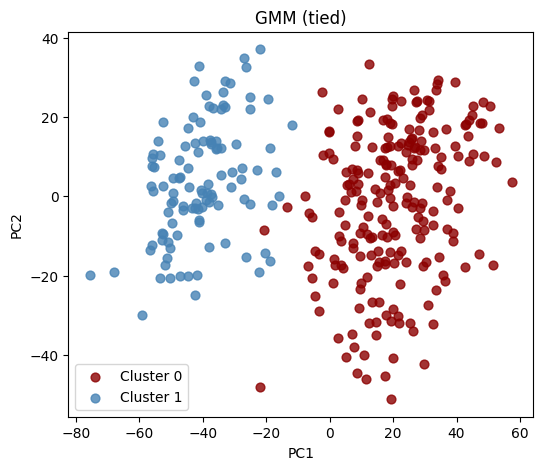

In [7]:
gmm_tied = GaussianMixture(
    n_components=2,
    covariance_type="tied",
    random_state=42
)
#gmm tied
labels_gmm_tied = gmm_tied.fit_predict(X_pca_5)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca_5[labels_gmm_tied == 0, 0],
            X_pca_5[labels_gmm_tied == 0, 1],
            color="darkred", alpha=0.8, s=40, label="Cluster 0")
plt.scatter(X_pca_5[labels_gmm_tied == 1, 0],
            X_pca_5[labels_gmm_tied == 1, 1],
            color="steelblue", alpha=0.8, s=40, label="Cluster 1")
plt.title("GMM (tied)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(loc="lower left")
plt.show()


In [8]:

X_gmm = X_pca_5[:, :2] 

gmm_spherical = GaussianMixture(
    n_components=2,
    covariance_type="spherical",
    random_state=42,
    n_init=10
)

labels_gmm_spherical = gmm_spherical.fit_predict(X_gmm)

print("GMM spherical labels:", np.unique(labels_gmm_spherical), "n=", len(labels_gmm_spherical))


GMM spherical labels: [0 1] n= 327


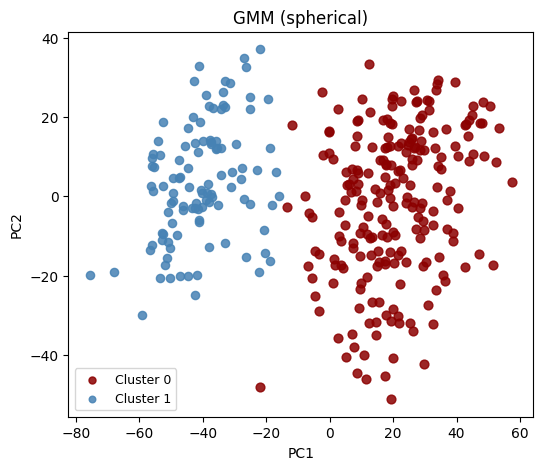

In [9]:
#gmm spherical colorfull clsuters
X_plot = X_pca_5[:, :2]

plt.figure(figsize=(6, 5))

# Clusterfarben: rot & blau (wie gewünscht)
plt.scatter(X_plot[labels_gmm_spherical == 0, 0], 
            X_plot[labels_gmm_spherical == 0, 1],
            color="darkred", alpha=0.85, s=40, marker="o", label="Cluster 0")
plt.scatter(X_plot[labels_gmm_spherical == 1, 0], X_plot[labels_gmm_spherical == 1, 1],
            color="steelblue", alpha=0.85, s=35, marker="o", label="Cluster 1")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("GMM (spherical)")
plt.legend(
    loc="lower left",
    fontsize=9,
    frameon=True,
    markerscale=0.8,
    borderpad=0.4
)
plt.show()


#### ***DBScan***

In [10]:
#DBSscn colorfull clsuters - at least tried to be colorfull, just noise
import numpy as np
from sklearn.cluster import DBSCAN

for eps in np.linspace(0.5, 6.0, 15):
    labels_tmp = DBSCAN(eps=float(eps), min_samples=5).fit_predict(X_pca_5)
    n_clusters = len(set(labels_tmp) - {-1})
    n_noise = np.sum(labels_tmp == -1)
    print(f"eps={eps:.2f} | clusters={n_clusters} | noise={n_noise}")


eps=0.50 | clusters=0 | noise=327
eps=0.89 | clusters=0 | noise=327
eps=1.29 | clusters=0 | noise=327
eps=1.68 | clusters=0 | noise=327
eps=2.07 | clusters=0 | noise=327
eps=2.46 | clusters=0 | noise=327
eps=2.86 | clusters=0 | noise=327
eps=3.25 | clusters=0 | noise=327
eps=3.64 | clusters=0 | noise=327
eps=4.04 | clusters=0 | noise=327
eps=4.43 | clusters=0 | noise=327
eps=4.82 | clusters=0 | noise=327
eps=5.21 | clusters=0 | noise=327
eps=5.61 | clusters=0 | noise=327
eps=6.00 | clusters=0 | noise=327


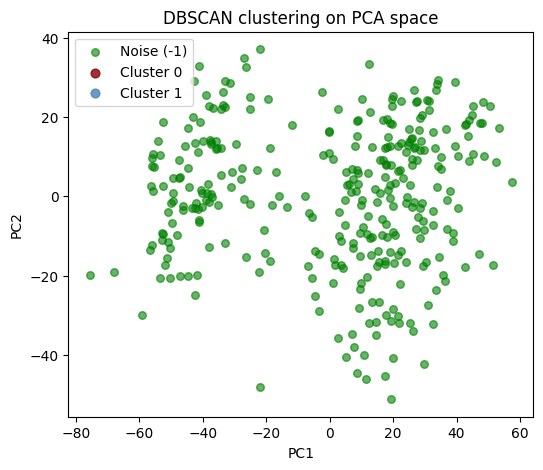

In [29]:
import matplotlib.pyplot as plt
#run after notebook is run once, than it works

plt.figure(figsize=(6, 5))

plt.scatter(
    X_pca_5[labels_db == -1, 0],
    X_pca_5[labels_db == -1, 1],
    color="green",
    label="Noise (-1)",
    alpha=0.6,
    s=30
)

plt.scatter(
    X_pca_5[labels_db == 0, 0],
    X_pca_5[labels_db == 0, 1],
    color="darkred",
    label="Cluster 0",
    alpha=0.8,
    s=40
)

plt.scatter(
    X_pca_5[labels_db == 1, 0],
    X_pca_5[labels_db == 1, 1],
    color="steelblue",
    label="Cluster 1",
    alpha=0.8,
    s=40
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN clustering on PCA space")
plt.legend()
plt.show()


Since DB scan (Density-Based Spatial Clustering of Applications with Noise) only identifies one cluster, possibly HDBScan (Hierarchical DBScan) can lead to differentiation and two clusters. The big advantage, identify outliers shows its limits, as everything is interpreted as outlier. 
The hierarchy aspect serches for clusters in the clusters - so while DBScan could not identify a cluster, HDBScan might. 

#### ***HDBScan***

In [12]:
import hdbscan

hdb = hdbscan.HDBSCAN(
    min_cluster_size=20,  
    min_samples=5          
)

labels_hdb = hdb.fit_predict(X_pca_5)

In [13]:
import numpy as np
print(np.unique(labels_hdb, return_counts=True))


(array([-1,  0,  1]), array([ 10, 212, 105]))


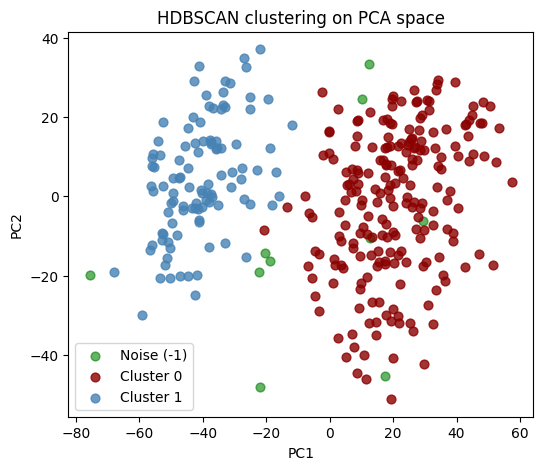

In [14]:
#hdbscan colorfull clsuters
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))

plt.scatter(
    X_pca_5[labels_hdb == -1, 0],
    X_pca_5[labels_hdb == -1, 1],
    color="green",
    alpha=0.6,
    s=40,
    label="Noise (-1)"
)

plt.scatter(
    X_pca_5[labels_hdb == 0, 0],
    X_pca_5[labels_hdb == 0, 1],
    color="darkred",
    alpha=0.8,
    s=40,
    label="Cluster 0"
)

plt.scatter(
    X_pca_5[labels_hdb == 1, 0],
    X_pca_5[labels_hdb == 1, 1],
    color="steelblue",
    alpha=0.8,
    s=40,
    label="Cluster 1"
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("HDBSCAN clustering on PCA space")
plt.legend(loc="lower left")
plt.show()


In [15]:
hdb.cluster_persistence_

array([0.30935001, 0.3364784 ])

HDBscan found two cluster, going in line with the performance of other algorithm already used in the project. It important to acknowledge, that there is no "real" truth within the different findings from DBScan an d HDBScan - its just underlaying the theory arising from the other algorithms. Interestingly, there is some identifyed noise in the HDBScan result. To evaluate the stability of the cluster, a persistance analysis was performed. The result of about 0.31/0.34 shows, that the both moderately stable and there is no superior cluster. (first value = persistance clsuter 0, secont value persitance cluster 1)

In [16]:
hdb = hdbscan.HDBSCAN(
    min_cluster_size=55,  
    min_samples=5
)
labels_hdb = hdb.fit_predict(X_pca_5)
print(hdb.cluster_persistence_)


[0.33728518 0.34174267]


Larger min_cluster_sizes might lead to more stable clusters, as seen above - but not allways. An example bellow shows decreased stability for one cluster with increased min_cluster_sizes.

In [17]:
hdb = hdbscan.HDBSCAN(
    min_cluster_size=75,  
    min_samples=5
)
labels_hdb = hdb.fit_predict(X_pca_5)
print(hdb.cluster_persistence_)


[0.34105641 0.28814105]


In [30]:
#asignment probabilites of each datapoint to the cluster 1=save assignment
hdb.probabilities_


array([0.69658473, 0.91962702, 0.88610568, 0.99797035, 0.78519507,
       1.        , 0.97478561, 1.        , 0.96337673, 0.75761654,
       1.        , 1.        , 0.74762439, 1.        , 0.94001061,
       1.        , 0.70447459, 0.68245416, 0.71922221, 1.        ,
       0.92110562, 1.        , 0.72177499, 0.76388827, 0.86946372,
       0.6698979 , 0.5674312 , 1.        , 1.        , 1.        ,
       0.7023332 , 1.        , 0.7528298 , 0.76817495, 0.55622889,
       1.        , 1.        , 0.91202394, 0.68038966, 1.        ,
       1.        , 0.78662758, 0.67245029, 0.75990668, 0.87291311,
       0.7231659 , 0.72865843, 1.        , 1.        , 1.        ,
       0.7967647 , 1.        , 0.91202394, 0.56156696, 0.98306351,
       0.73498576, 1.        , 1.        , 0.9095363 , 0.96499703,
       1.        , 1.        , 0.7312559 , 1.        , 1.        ,
       0.83160414, 1.        , 0.88255757, 1.        , 0.63683121,
       0.61964121, 0.89778441, 1.        , 1.        , 1.     

The probabilities show the connection to the clusters. 

In [34]:
p0 = hdb.probabilities_[labels_hdb == 0]

p0.mean(), p0.min(), np.quantile(p0, [0.1, 0.5, 0.9])


(np.float64(0.8752057642748822),
 np.float64(0.5538423350807906),
 array([0.67263919, 0.92029007, 1.        ]))

#### ***Agglomerative cluster***

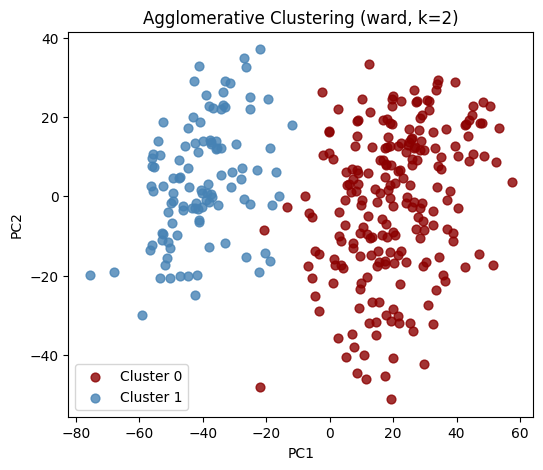

In [18]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# 1) fit + labels colorfull clsuters
agg = AgglomerativeClustering(n_clusters=2, linkage="ward")
labels_agg = agg.fit_predict(X_pca_5)

# 2) plot
plt.figure(figsize=(6, 5))

plt.scatter(
    X_pca_5[labels_agg == 0, 0],
    X_pca_5[labels_agg == 0, 1],
    color="darkred",
    label="Cluster 0",
    alpha=0.8,
    s=40
)

plt.scatter(
    X_pca_5[labels_agg == 1, 0],
    X_pca_5[labels_agg == 1, 1],
    color="steelblue",
    label="Cluster 1",
    alpha=0.8,
    s=40
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Agglomerative Clustering (ward, k=2)")
plt.legend(loc="lower left")
plt.show()


#### ***Ground truth ER***

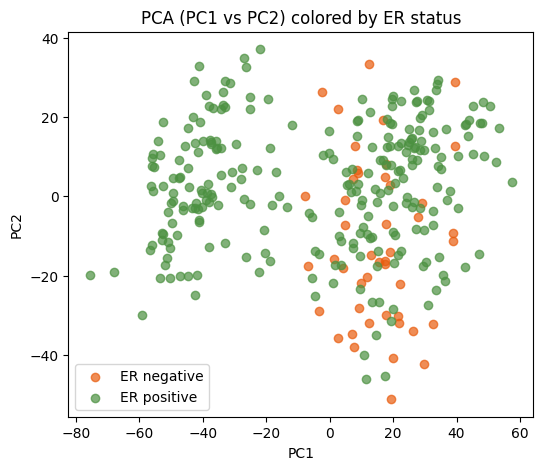

In [28]:
# run after notebook is fully run once, than it works
ier_status = df_pat["er"]

plt.figure(figsize=(6, 5))

plt.scatter(
    X_pca_5[er_status == 0, 0],
    X_pca_5[er_status == 0, 1],
    color="#E95D0F",
    alpha=0.7,
    label="ER negative"
)

plt.scatter(
    X_pca_5[er_status == 1, 0],
    X_pca_5[er_status == 1, 1],
    color= "#4C9141",
    alpha=0.7,
    label="ER positive"
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (PC1 vs PC2) colored by ER status")
plt.legend()
plt.show()



#### ***Common plot***

In [20]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_pca_5)

gmm = GaussianMixture(n_components=2, random_state=42)
labels_gmm = gmm.fit_predict(X_pca_5)

dbscan = DBSCAN(eps=3.5, min_samples=5)
labels_db = dbscan.fit_predict(X_pca_5)


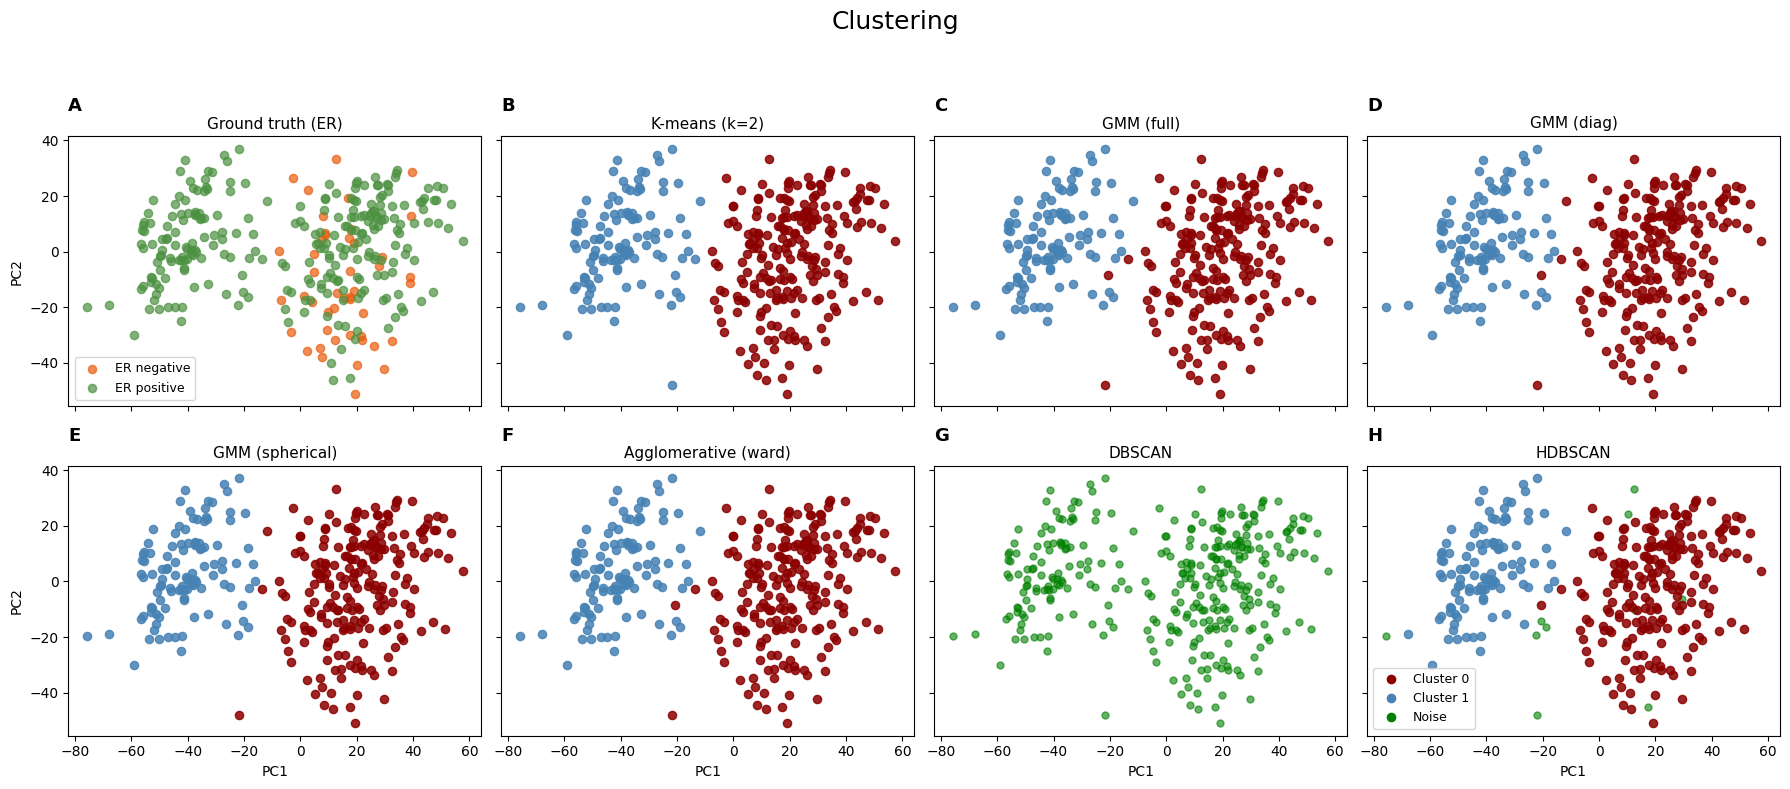

In [36]:
#create one plot for display
import numpy as np
import matplotlib.pyplot as plt
import string
panel_labels = list(string.ascii_uppercase[:8])  

X_plot = X_pca_5[:, :2]
er_status = np.asarray(df_pat["er"])  # 0/1

C_CLUSTER0 = "darkred"    
C_CLUSTER1 = "steelblue"  

C_GT0 = "#E95D0F"        
C_GT1 = "#4C9141" 

C_NOISE = "green"         

from matplotlib.lines import Line2D

cluster_legend_elements = [
    Line2D([0], [0], marker='o', color='w',
           label='Cluster 0', markerfacecolor=C_CLUSTER0, markersize=8),
    Line2D([0], [0], marker='o', color='w',
           label='Cluster 1', markerfacecolor=C_CLUSTER1, markersize=8),
    Line2D([0], [0], marker='o', color='w',
           label='Noise', markerfacecolor=C_NOISE, markersize=8),
]

def plot_ground_truth(ax):
    ax.scatter(X_plot[er_status == 0, 0], X_plot[er_status == 0, 1],
               color=C_GT0, alpha=0.7, s=35, marker="o", label="ER negative")
    ax.scatter(X_plot[er_status == 1, 0], X_plot[er_status == 1, 1],
               color=C_GT1, alpha=0.7, s=35, marker="o", label="ER positive")
    ax.set_title("Ground truth (ER)", fontsize=11)
    ax.legend(frameon=True, fontsize=9, loc="best")

def plot_binary_clusters(ax, labels, title, show_noise=False):
    labels = np.asarray(labels)

    if show_noise and np.any(labels == -1):
        ax.scatter(X_plot[labels == -1, 0], X_plot[labels == -1, 1],
                   color=C_NOISE, alpha=0.6, s=25, marker="o", label="Noise (-1)")

    if np.any(labels == 0):
        ax.scatter(X_plot[labels == 0, 0], X_plot[labels == 0, 1],
                   color=C_CLUSTER0, alpha=0.85, s=35, marker="o")
    if np.any(labels == 1):
        ax.scatter(X_plot[labels == 1, 0], X_plot[labels == 1, 1],
                   color=C_CLUSTER1, alpha=0.85, s=35, marker="o")

    ax.set_title(title, fontsize=11)

fig, axes = plt.subplots(2, 4, figsize=(18, 8), sharex=True, sharey=True)
fig.suptitle("Clustering", fontsize=18)
axes = axes.ravel()

candidates = [
    ("K-means (k=2)", "labels_kmeans", False),
    ("GMM (full)", "labels_gmm", False),
    ("GMM (diag)", "labels_gmm_diag", False),
    ("GMM (spherical)", "labels_gmm_spherical", False),
    ("Agglomerative (ward)", "labels_agg", False),
    ("DBSCAN", "labels_db", True),
    ("HDBSCAN", "labels_hdb", True),
]


plot_ground_truth(axes[0])

axes[0].text(
    0.0, 1.08, panel_labels[0],
    transform=axes[0].transAxes,
    fontsize=13,
    fontweight="bold",
    va="bottom",
    ha="left",
    clip_on=False
)


slot = 1
for title, varname, show_noise in candidates:
    if slot >= 8:
        break
    ax = axes[slot]

    if varname in globals():
        lab = globals()[varname]
        if len(lab) == X_plot.shape[0]:
            plot_binary_clusters(ax, lab, title, show_noise=show_noise)
        else:
            ax.set_title(f"{title}\n(Länge passt nicht)", fontsize=11)
            ax.text(
                0.05, 0.95,
                f"labels: {len(lab)}\nX: {X_plot.shape[0]}",
                transform=ax.transAxes,
                va="top"
            )

        ax.text(
            0.0, 1.08, panel_labels[slot],
            transform=ax.transAxes,
            fontsize=13,
            fontweight="bold",
            va="bottom",
            ha="left",
            clip_on=False
        )

        slot += 1



for i in range(slot, 8):
    axes[i].axis("off")


for ax in axes[4:]:
    ax.set_xlabel("PC1")
for ax in axes[0::4]:
    ax.set_ylabel("PC2")


axes[-1].legend(
    handles=cluster_legend_elements,
    loc="lower left",
    fontsize=9,
    frameon=True,
    borderpad=0.4
)

plt.tight_layout(rect=[0, 0, 1, 0.94])

plt.savefig(
    "Clustering.jpeg",
    dpi=1200,
    bbox_inches="tight"
)

plt.show()


#### ***Internal metrics***

In [39]:
#silhouette and davies bouldin, to asses the clustering of each algorithm
import numpy as np
import pandas as pd

from sklearn.metrics import silhouette_score, davies_bouldin_score

X_eval = X_pca_5[:, :2]

candidates = {
    "KMeans (k=2)": "labels_kmeans",
    "GMM (full)": "labels_gmm",
    "GMM (diag)": "labels_gmm_diag",
    "GMM (spherical)": "labels_gmm_spherical",
    "Agglomerative (ward)": "labels_agg",
}

results = []

for method_name, varname in candidates.items():
    if varname not in globals():
        print(f"Überspringe {method_name}: Variable '{varname}' nicht gefunden.")
        continue

    labels = np.asarray(globals()[varname])

    if len(labels) != X_eval.shape[0]:
        print(f"Überspringe {method_name}: Länge passt nicht (labels={len(labels)} vs X={X_eval.shape[0]}).")
        continue

    if len(np.unique(labels)) < 2:
        print(f"Überspringe {method_name}: nur 1 Cluster gefunden.")
        continue

    sil = silhouette_score(X_eval, labels)
    db = davies_bouldin_score(X_eval, labels)

    results.append({
        "method": method_name,
        "silhouette (higher=better)": sil,
        "davies_bouldin (lower=better)": db,
        "n_clusters": len(np.unique(labels))
    })

df_internal = pd.DataFrame(results).sort_values("silhouette (higher=better)", ascending=False)

print("\nInterne Clustering-Metriken (auf PC1/PC2):")
display(df_internal)



Interne Clustering-Metriken (auf PC1/PC2):


,method,silhouette (higher=better),davies_bouldin (lower=better),n_clusters
0,KMeans (k=2),0.567247,0.625397,2
3,GMM (spherical),0.565614,0.619145,2
1,GMM (full),0.563737,0.621994,2
4,Agglomerative (ward),0.563737,0.621994,2
2,GMM (diag),0.563438,0.619528,2


all clusters have close to 0.56 silhouette and 0.62 Davies Bouldin score -> all very close to the other results - leaves no clear "best" choice. But there are differences in visually checking the results. KNN seems the most suitable.

In [38]:

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score


X_eval = X_pca_5[:, :2]

def mean_pairwise_ari(labels_list):
    """Berechnet den mittleren ARI über alle Paare von Clusterings."""
    aris = []
    n = len(labels_list)
    for i in range(n):
        for j in range(i+1, n):
            aris.append(adjusted_rand_score(labels_list[i], labels_list[j]))
    return float(np.mean(aris)), float(np.std(aris))

def stability_kmeans(X, n_runs=20, k=2):
    labels_list = []
    for seed in range(n_runs):
        model = KMeans(n_clusters=k, random_state=seed, n_init=10)
        labels_list.append(model.fit_predict(X))
    return mean_pairwise_ari(labels_list)

def stability_gmm(X, n_runs=20, k=2, covariance_type="full"):
    labels_list = []
    for seed in range(n_runs):
        model = GaussianMixture(
            n_components=k,
            covariance_type=covariance_type,
            random_state=seed,
            n_init=1
        )
        labels_list.append(model.fit_predict(X))
    return mean_pairwise_ari(labels_list)

results = []

mean_ari, std_ari = stability_kmeans(X_eval, n_runs=20, k=2)
results.append({"method": "KMeans (k=2)", "mean_ARI (higher=more stable)": mean_ari, "std_ARI": std_ari})

for cov in ["full", "diag", "spherical"]:
    mean_ari, std_ari = stability_gmm(X_eval, n_runs=20, k=2, covariance_type=cov)
    results.append({"method": f"GMM ({cov})", "mean_ARI (higher=more stable)": mean_ari, "std_ARI": std_ari})

df_stability = pd.DataFrame(results).sort_values("mean_ARI (higher=more stable)", ascending=False).reset_index(drop=True)

print("Stabilität (20 Runs, paarweiser ARI) auf PC1/PC2:")
display(df_stability)


Stabilität (20 Runs, paarweiser ARI) auf PC1/PC2:


,method,mean_ARI (higher=more stable),std_ARI
0,KMeans (k=2),1.0,0.0
1,GMM (full),1.0,0.0
2,GMM (diag),1.0,0.0
3,GMM (spherical),1.0,0.0


Only GMM and KMeans have random elements in their behaviour, this is why Stability with ARI (***Adjusted Rand Index***) is only applicable for these methods. mean_ARI 1 is a very good result, as the repeated clusterings are the same. std_ARI = 0 proves no deviation between the algorithm runs. Stability is only evaluated on the 2D version of the PCA!

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

try:
    import hdbscan
    HAS_HDBSCAN = True
except ImportError:
    HAS_HDBSCAN = False

X_eval = X_pca_5[:, :2]

def subsampling_stability_dbscan(X, labels_full, n_runs=20, subsample_frac=0.8):
    """
    Subsampling-Stabilität für DBSCAN/HDBSCAN.
    Vergleicht Cluster-Zuordnungen auf gemeinsamen Punkten.
    """
    n = X.shape[0]
    indices = np.arange(n)
    labelings = []
    index_sets = []

    for seed in range(n_runs):
        rng = np.random.default_rng(seed)
        subsample_idx = rng.choice(indices, size=int(subsample_frac * n), replace=False)
        subsample_idx = np.sort(subsample_idx)

        X_sub = X[subsample_idx]
        labelings.append(labels_full[subsample_idx])
        index_sets.append(subsample_idx)

    aris = []

    for i in range(n_runs):
        for j in range(i + 1, n_runs):
            common = np.intersect1d(index_sets[i], index_sets[j])
            if len(common) < 10:
                continue

            # Indizes auf Subsets abbilden
            idx_i = np.isin(index_sets[i], common)
            idx_j = np.isin(index_sets[j], common)

            labels_i = labelings[i][idx_i]
            labels_j = labelings[j][idx_j]

            if len(np.unique(labels_i)) < 2 or len(np.unique(labels_j)) < 2:
                continue

            aris.append(adjusted_rand_score(labels_i, labels_j))

    return float(np.mean(aris)), float(np.std(aris)), len(aris)


results = []


if "labels_db" in globals():
    mean_ari, std_ari, n_pairs = subsampling_stability_dbscan(
        X_eval, np.asarray(labels_db)
    )
    results.append({
        "method": "DBSCAN",
        "mean_ARI": mean_ari,
        "std_ARI": std_ari,
        "n_pairs_used": n_pairs
    })


if HAS_HDBSCAN and "labels_hdb" in globals():
    mean_ari, std_ari, n_pairs = subsampling_stability_dbscan(
        X_eval, np.asarray(labels_hdb)
    )
    results.append({
        "method": "HDBSCAN",
        "mean_ARI": mean_ari,
        "std_ARI": std_ari,
        "n_pairs_used": n_pairs
    })

df_subsampling = pd.DataFrame(results)

print("Subsampling-Stabilität (80% Daten, ARI auf gemeinsamen Punkten):")
display(df_subsampling)


Subsampling-Stabilität (80% Daten, ARI auf gemeinsamen Punkten):


C:\PAML\PAML Project\venv\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\PAML\PAML Project\venv\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\PAML\PAML Project\venv\Lib\site-packages\numpy\_core\_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\PAML\PAML Project\venv\Lib\site-packages\numpy\_core\_methods.py:180: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\PAML\PAML Project\venv\Lib\site-packages\numpy\_core\_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,method,mean_ARI,std_ARI,n_pairs_used
0,DBSCAN,NaN,NaN,0
1,HDBSCAN,1.0,0.0,190


Logically, DBScan has no meaningfull result, as it was not able to create more than one group. 
The Results for HDBScan are compareable to the ones on KMeans and GMM - successfull and good separation with no errors for repeated runs. 

The K-means alogrith will be used for further predictions etc. 

#### ***Checking the cluster***

In [25]:
import pandas as pd
import numpy as np

cluster_labels = np.asarray(labels_kmeans)

assert len(cluster_labels) == len(df_pat), "Clusterlabels und df_pat haben unterschiedliche Länge!"

df_interpret = pd.DataFrame({
    "cluster": cluster_labels,
    "ER_status": df_pat["er"].values
})

df_interpret.head()


,cluster,ER_status
0,0,1.0
1,0,1.0
2,1,1.0
3,0,1.0
4,0,1.0


In [26]:
import pandas as pd
import numpy as np

cluster_labels = np.asarray(labels_kmeans)
er_status = np.asarray(df_pat["er"])

df_interpret = pd.DataFrame({
    "cluster": cluster_labels,
    "ER_status": er_status
})

ct_abs = pd.crosstab(df_interpret["cluster"], df_interpret["ER_status"])
ct_abs.columns = ["ER negative (0)", "ER positive (1)"]

print("Absolute Häufigkeiten (Anzahl Patienten):")
display(ct_abs)

ct_rel = ct_abs.div(ct_abs.sum(axis=1), axis=0) * 100

print("Relative Häufigkeiten pro Cluster (%):")
display(ct_rel.round(1))


Absolute Häufigkeiten (Anzahl Patienten):


,ER negative (0),ER positive (1)
cluster,,
0,46,151
1,0,111


Relative Häufigkeiten pro Cluster (%):


,ER negative (0),ER positive (1)
cluster,,
0,23.4,76.6
1,0.0,100.0


Clear depiction of the content of the two different clusters - not only is it visable but clear: cluster 1 has no ER negative findings, while cluster 0 inherits both, the ER positive and ER negative findings. 

In [42]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(ct_abs)

print("Chisquare-Test:")
print(f"Chisquare-value = {chi2:.3f}")
print(f"p-value    = {p_value:.4g}")


Chisquare-Test:
Chisquare-value = 28.659
p-value    = 8.63e-08


This result proves - clusters and ER status are not independant. The clusters are truely different, depending on ER - just as it is visible in the plots. 